In [96]:
import pandas as pd
import numpy as np
import sklearn
from matplotlib.pyplot import imshow, show
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import preprocessing
from PIL import Image
from IPython.display import display
%matplotlib inline

##### Importing dataset

In [97]:
train_data = np.genfromtxt("optdigits/optdigits.train", delimiter=',')
X_train = train_data[:,:-1]
y_train = train_data[:,-1]

test_data = np.genfromtxt("optdigits/optdigits.test", delimiter=',')
X_test = test_data[:,:-1]
y_test = test_data[:,-1]

In [98]:
from copy import deepcopy
from collections import defaultdict
import random

def min_dist(centroids, point):
    dist = np.array([np.inf]*10)
    for i,c in enumerate(centroids):
        dist[i]= np.linalg.norm(point-c)
    return np.argmin(dist)

def avg_mse(centroids,clusters):
    c_means = []
    for i,c in enumerate(clusters):
        t_dist = 0
        for p in c:
            t_dist += np.linalg.norm(p[:-1]-centroids[i])**2
        c_means.append(t_dist/len(c))
    return np.mean(c_means)

def k_means():
    
    centroids = []
    new_centroids = np.zeros([10,64])
    rand_index = random.sample(range(0, len(X_train)), 10)
    
    for i in range(10):
        new_centroids[i] = X_train[rand_index[i]]
        
    c_out = 0
    while np.array_equal(new_centroids, centroids) != True:
        clusters = [list() for i in range(10)]
        centroids = new_centroids
        new_centroids = np.zeros([10,64])
        
        for i in range(len(X_train)):
            cluster = min_dist(centroids, X_train[i])
            clusters[cluster].append(train_data[i])
        
        for i,c in enumerate(clusters):
            c = np.asarray(c)
            new_point = np.mean(c[:,:-1],axis=0)
            new_centroids[i] = new_point
            
    a_mse = avg_mse(centroids, clusters)
    return a_mse, centroids, clusters


##### 5 Runs

In [99]:
a_mse = np.inf
cal_centroids = None
clusters = None
for i in range(5):
    a_m,cens,clus = k_means()
    if a_m > a_mse:
        continue
    a_mse, cal_centroids, clusters = a_m, cens, clus


##### Classifying test data

In [100]:
centroid_class = {}
for i,c in enumerate(clusters):
    c = np.asarray(c)
    c = c[:,-1]
    unique, counts = np.unique(c, return_counts=True)
    labels = []
    for j in range(len(unique)):
        labels.append((counts[j],unique[j]))
    labels.sort()
    _,label = labels.pop()
    centroid_class[i] = int(label)

In [101]:
predicted = []
for i in range(len(X_test)):
    c_index = min_dist(cal_centroids, X_test[i])
    predicted.append(centroid_class[c_index])
print(f"Accuracy: {accuracy_score(y_test,predicted)}")

Accuracy: 0.7924318308291597


##### Confusion matrix

In [102]:
print(confusion_matrix(y_test,predicted))

[[176   0   0   0   2   0   0   0   0   0]
 [  0 156  21   1   0   1   3   0   0   0]
 [  1   4 149   9   0   0   0   4  10   0]
 [  0   1   0 163   0   2   0  10   7   0]
 [  0   9   0   0 160   0   0   7   5   0]
 [  0   1   0  31   1 148   1   0   0   0]
 [  1   4   0   0   0   0 175   0   1   0]
 [  0   8   0   0   1   1   0 166   3   0]
 [  0  29   1  10   0   1   1   1 131   0]
 [  0  26   0 145   0   3   0   3   3   0]]


##### Visualization

Number  5


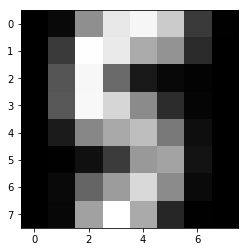

Number  6


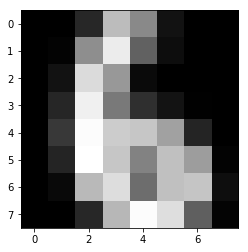

Number  2


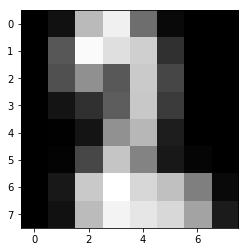

Number  3


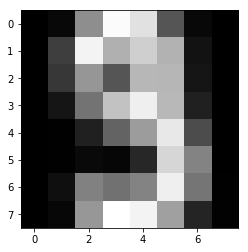

Number  8


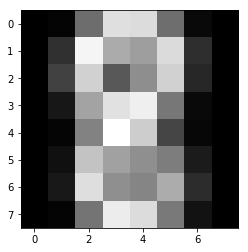

Number  0


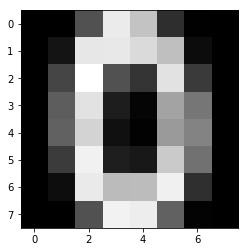

Number  7


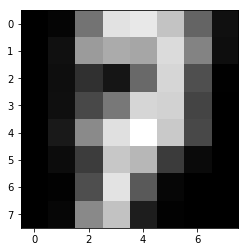

Number  1


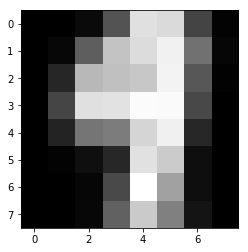

Number  1


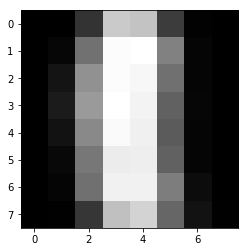

Number  4


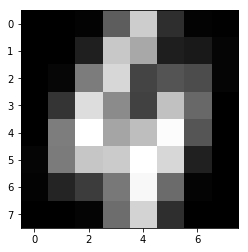

In [103]:
for i,c in enumerate(cal_centroids):
    c = np.asarray(c)
    c.resize((8,8))
    plt.imshow(c, cmap='gray')
    print("Number ", centroid_class[i])
    show()

##### Mean sq separation

In [104]:
def mss(centroids, k):
    d = 0
    for i,c in enumerate(centroids):
        for j in range(i+1, len(centroids)):
            d += np.linalg.norm(centroids[i]-centroids[j])**2
    return d/(k*(k-1)/2)

In [105]:
print(mss(cal_centroids, 10))

1263.3846404444118


##### Mean entropy

In [106]:
def m_entropy(clusters):
    result = 0
    total = 0
    for cl in clusters:
        entropy = 0
        cl = np.asarray(cl)
        cl = cl[:,-1]
        _, counts = np.unique(cl, return_counts=True)
        for c in counts:
            entropy -= c/np.sum(counts) * np.log(c/np.sum(counts))
        result += len(cl) * entropy
        total += len(cl)
    return result/total

In [107]:
print(m_entropy(clusters))

0.5586002287417595


##### Discussion

I got an overall accuracy of `79%`. I got MSS of `1263.38` which seems to be okay. And I got an entropy of `0.55`. The clusters I got do look like their associated digits.

##### Experiment 2

In [108]:
def min_dist(centroids, point):
    dist = np.array([np.inf]*30)
    for i,c in enumerate(centroids):
        dist[i]= np.linalg.norm(point-c)
    return np.argmin(dist)


def k_means_30():
    
    centroids = []
    new_centroids = np.zeros([30,64])
    rand_index = random.sample(range(0, len(X_train)), 30)
    
    for i in range(30):
        new_centroids[i] = X_train[rand_index[i]]
        
    c_out = 0
    while np.array_equal(new_centroids, centroids) != True:
        clusters = [list() for i in range(30)]
        centroids = new_centroids
        new_centroids = np.zeros([30,64])
        
        for i in range(len(X_train)):
            cluster = min_dist(centroids, X_train[i])
            clusters[cluster].append(train_data[i])
        
        for i,c in enumerate(clusters):
            c = np.asarray(c)
            new_point = np.mean(c[:,:-1],axis=0)
            new_centroids[i] = new_point
            
    a_mse = avg_mse(centroids, clusters)
    return a_mse, centroids, clusters


##### 5 runs

In [109]:
a_mse = np.inf
cal_centroids = None
clusters = None
for i in range(5):
    a_m,cens,clus = k_means_30()
    if a_m > a_mse:
        continue
    a_mse, cal_centroids, clusters = a_m, cens, clus


##### Classifying test data

In [110]:
centroid_class = {}
for i,c in enumerate(clusters):
    c = np.asarray(c)
    c = c[:,-1]
    unique, counts = np.unique(c, return_counts=True)
    labels = []
    for j in range(len(unique)):
        labels.append((counts[j],unique[j]))
    labels.sort()
    _,label = labels.pop()
    centroid_class[i] = int(label)

In [111]:
predicted = []
for i in range(len(X_test)):
    c_index = min_dist(cal_centroids, X_test[i])
    predicted.append(centroid_class[c_index])
print(f"Accuracy: {accuracy_score(y_test,predicted)}")

Accuracy: 0.9348914858096828


##### Confusion matrix

In [112]:
print(confusion_matrix(y_test,predicted))

[[177   0   0   0   1   0   0   0   0   0]
 [  0 171   0   0   0   1   0   0   7   3]
 [  1   2 169   1   0   0   0   2   0   2]
 [  0   0   1 167   0   1   0   6   5   3]
 [  0   6   0   0 171   0   1   2   1   0]
 [  0   0   0   0   1 176   0   0   0   5]
 [  2   1   0   0   0   0 175   0   3   0]
 [  0   0   0   0   0   0   0 173   1   5]
 [  0  15   0   5   0   1   0   1 145   7]
 [  0   2   0   5   0   4   0   5   8 156]]


##### Visualization

Number  0


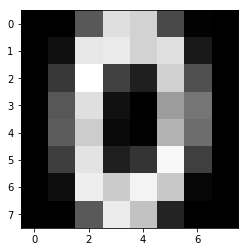

Number  1


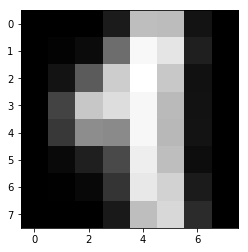

Number  4


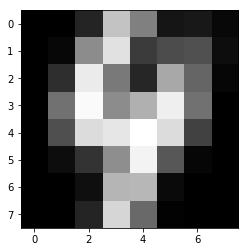

Number  7


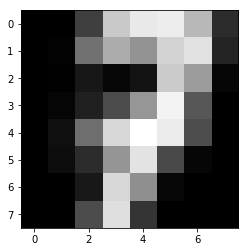

Number  7


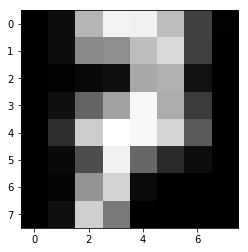

Number  9


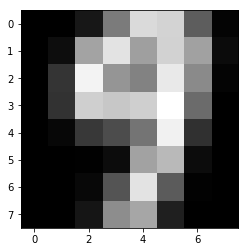

Number  8


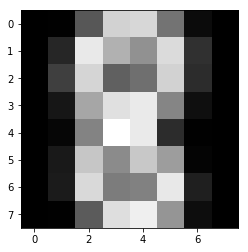

Number  6


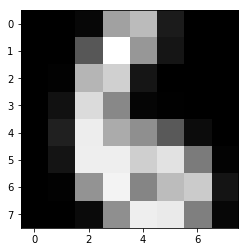

Number  8


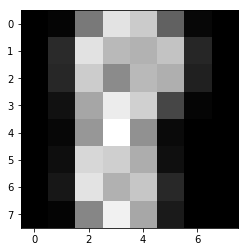

Number  5


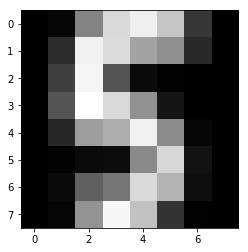

Number  5


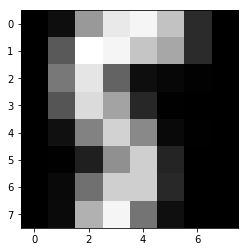

Number  6


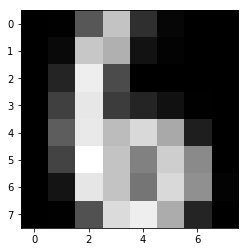

Number  3


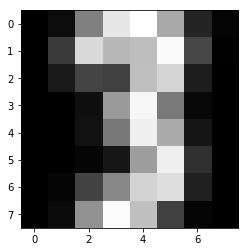

Number  2


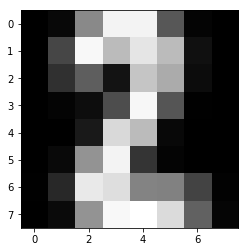

Number  0


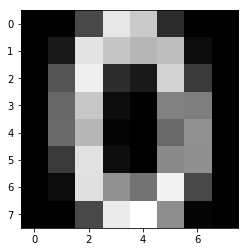

Number  7


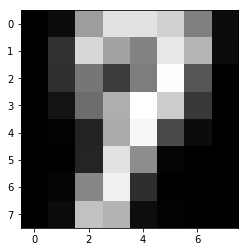

Number  5


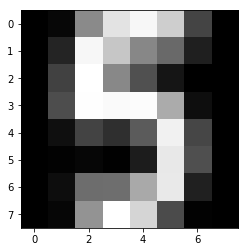

Number  0


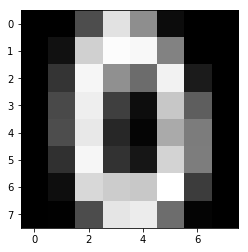

Number  6


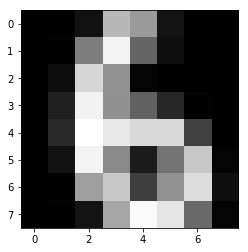

Number  2


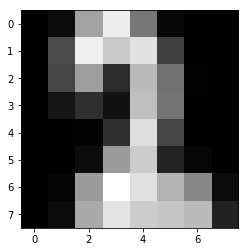

Number  1


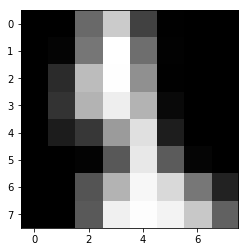

Number  7


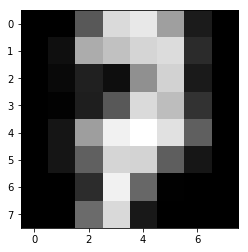

Number  4


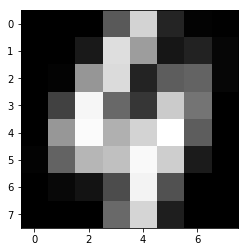

Number  1


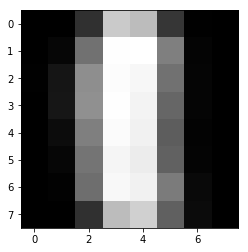

Number  8


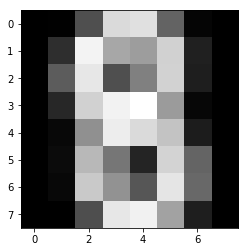

Number  9


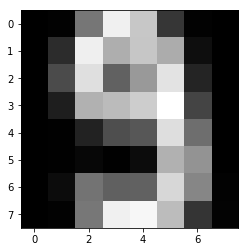

Number  2


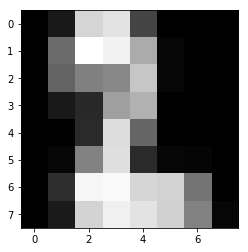

Number  3


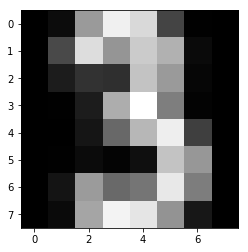

Number  4


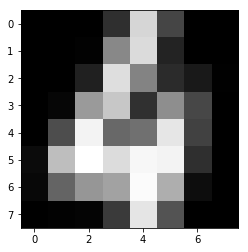

Number  3


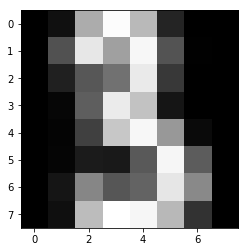

In [113]:
for i,c in enumerate(cal_centroids):
    c = np.asarray(c)
    c.resize((8,8))
    print("Number ", centroid_class[i])
    plt.imshow(c, cmap='gray')
    show()

##### Mean sq separation

In [114]:
print(mss(cal_centroids, 30))

1537.5293169646352


##### Mean entropy

In [115]:
print(m_entropy(clusters))

0.23252236367040377


##### Discussion

With k = 30, I got an accuracy of `93%` which is significantly higher than the previous experiment. With k = 30, I got MSS of `1537.52` which is again greater than experiment 1 which is a good indicator for good classifier. I got an entropy of `0.232` which is lower than experiment1. The visualized pixels look a little closer to their associated values compared to experiment 1. 

##### Instructions of how to run the program

I have written two separate functions for computing K means one for 10 and another for 30. I could have written just one function for both, but due to lack of time and I'm rushing through this homework, and I apologize for that. You can simply click on the run button on your Jupyter notebook to run the program. 